# In this notebook we will take a look at one of the most reknowned dimensionality reduction techniques in machine learning and data science technology. Finally we will dig deep in the methodology so as to understand the exact working of the algorithm easily. 
# **Principle Component Analysis**

## How PCA works?

Understanding PCA without visuals is difficult so I would strongly recommend watching this quick video after this notebook implementation.
## [PCA in detail](https://www.youtube.com/watch?v=_UVHneBUBW0&t=2s)

PCA finds the principal components of data.

It is often useful to measure data in terms of its principal components rather than on a normal x-y axis. So what are principal components then? They’re the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. 


PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle
axis occurs first. (more important = more variance/more spread out data)

How does PCA work -

* Calculate the covariance matrix X of data points.
* Calculate eigen vectors and corresponding eigen values.
* Sort the eigen vectors according to their eigen values in decreasing order.
* Choose first k eigen vectors and that will be the new k dimensions.
* Transform the original n dimensional data points into k dimensions.


For Eigen term details : http://setosa.io/ev/eigenvectors-and-eigenvalues/

Implementing PCA on a 2-D Dataset
### Step 1: Normalize the data

First step is to normalize the data that we have so that PCA works properly. This is done by subtracting the respective means from the numbers in the respective column. So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

### Step 2: Calculate the covariance matrix

Since the dataset we took is 2-dimensional, this will result in a 2x2 Covariance matrix.
 
![](https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Covariance+Matrix.JPG) 


Please note that Var[X1] = Cov[X1,X1] and Var[X2] = Cov[X2,X2].

### Step 3: Calculate the eigenvalues and eigenvectors

Next step is to calculate the eigenvalues and eigenvectors for the covariance matrix. The same is possible because it is a square matrix. ƛ is an eigenvalue for a matrix A if it is a solution of the characteristic equation:

det( ƛI - A ) = 0

Where, I is the identity matrix of the same dimension as A which is a required condition for the matrix subtraction as well in this case and ‘det’ is the determinant of the matrix. For each eigenvalue ƛ, a corresponding eigen-vector v, can be found by solving:

( ƛI - A )v = 0

### Step 4: Choosing components and forming a feature vector:

We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. Here comes the dimensionality reduction part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with. To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

Many thanks to :
* https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
* https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
* https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [3]:
iris_data = pd.read_csv(r"C:\Users\Neil\Untitled Folder\Iris.csv", index_col='Id')


# Univariate EDA

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

C:\Users\Neil\AppData\Local\Temp\ipykernel_5364\2240324172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
C:\Users\Neil\AppData\Local\Temp\ipykernel_5364\2240324172.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [9]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [10]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(iris_data)

ModuleNotFoundError: No module named 'missingno'

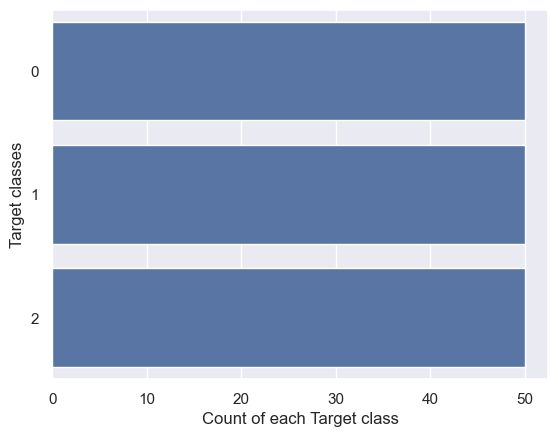

In [11]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Early Insights : 
1. 150 rows
2. 4 Independent variables to act as factors
3. All have same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each).

### Now some deeper explorations!

# Bivariate EDA

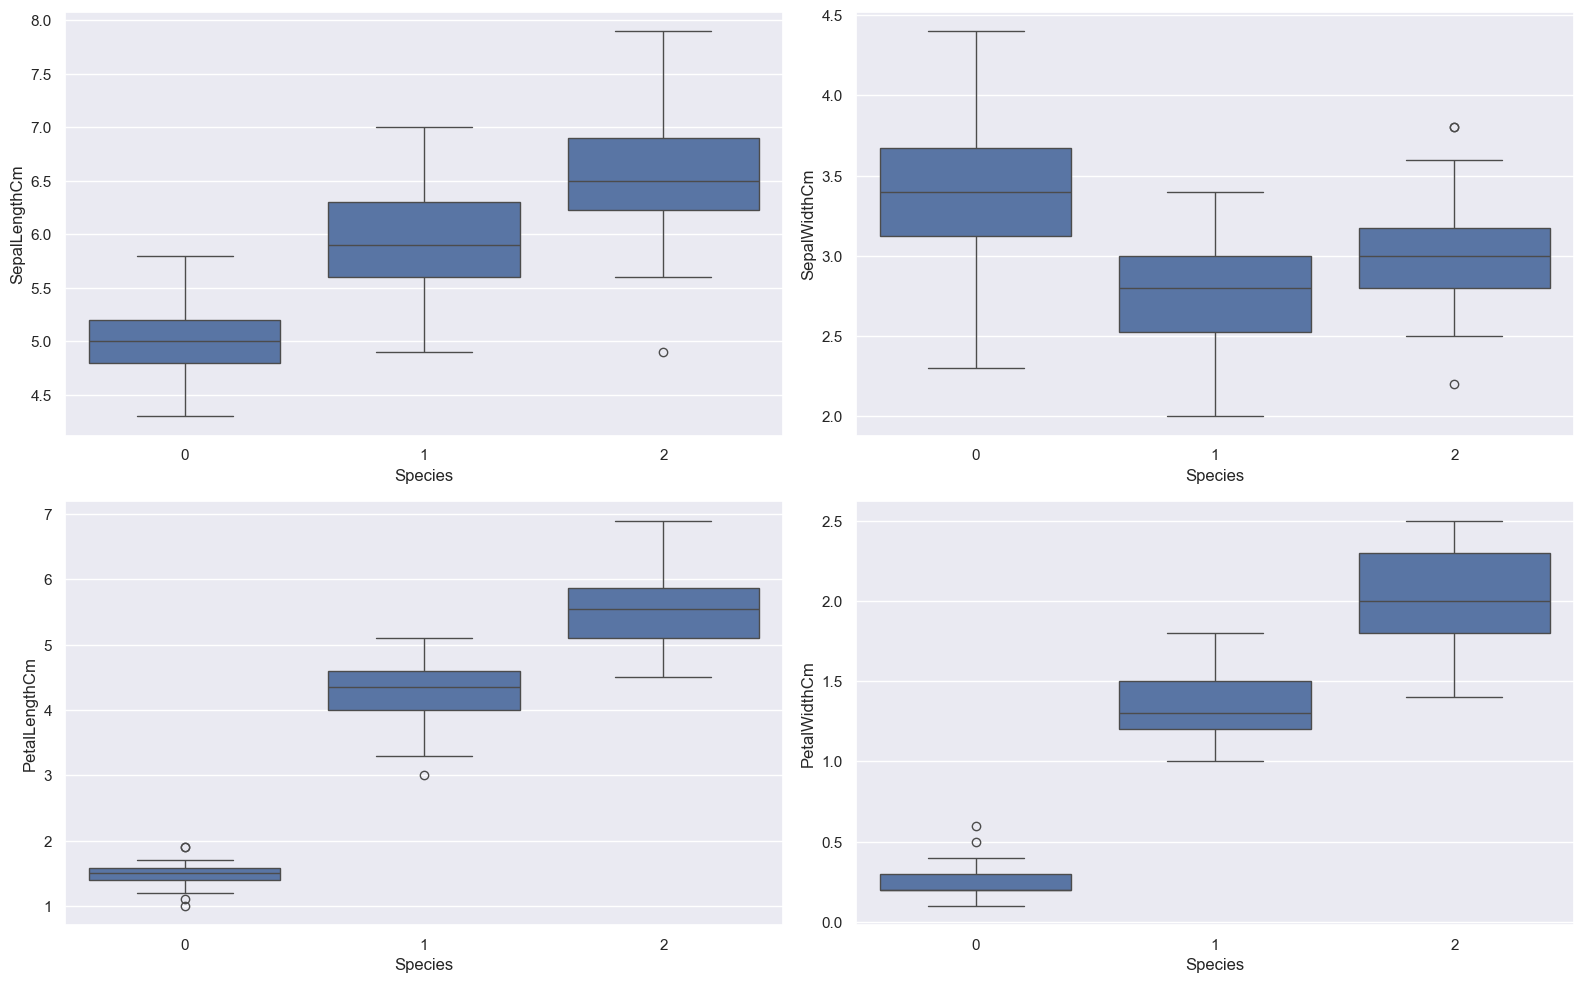

In [12]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

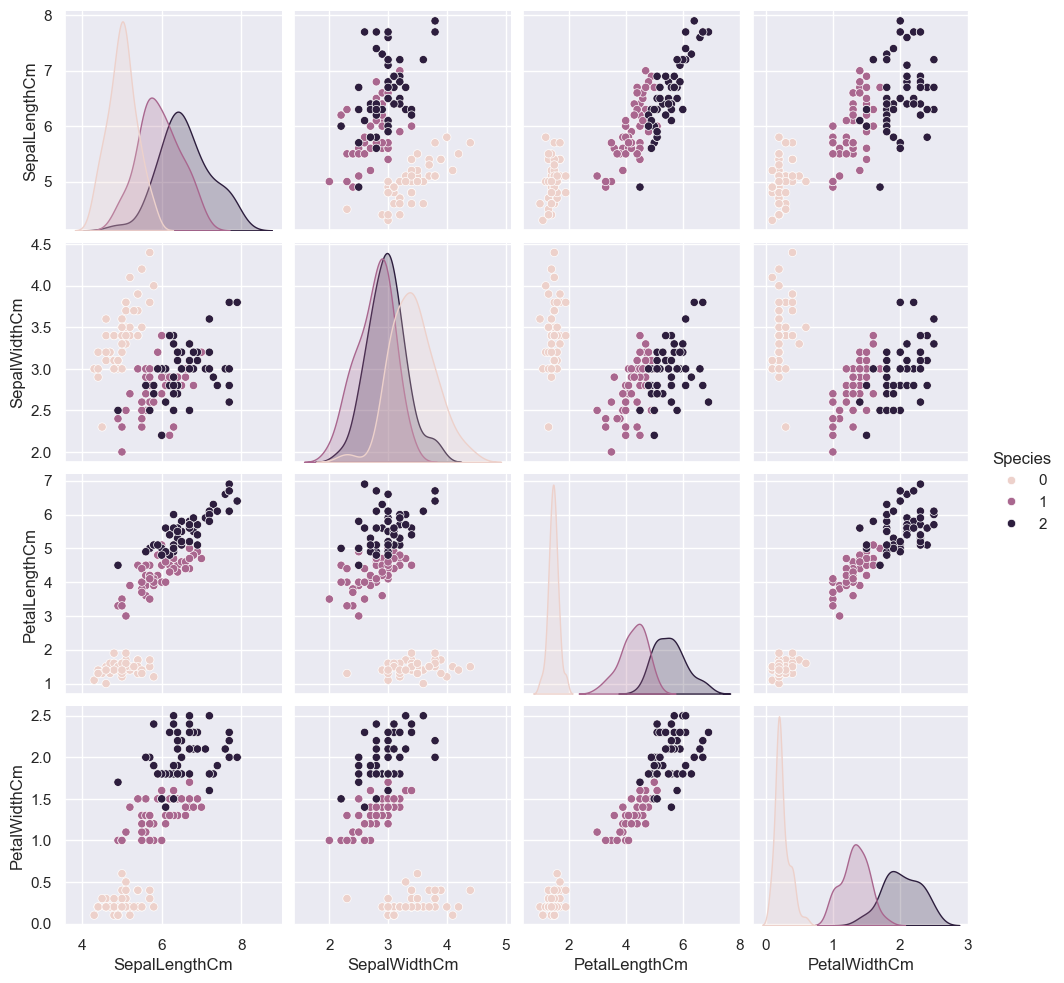

In [13]:
p=sns.pairplot(iris_data, hue = 'Species')

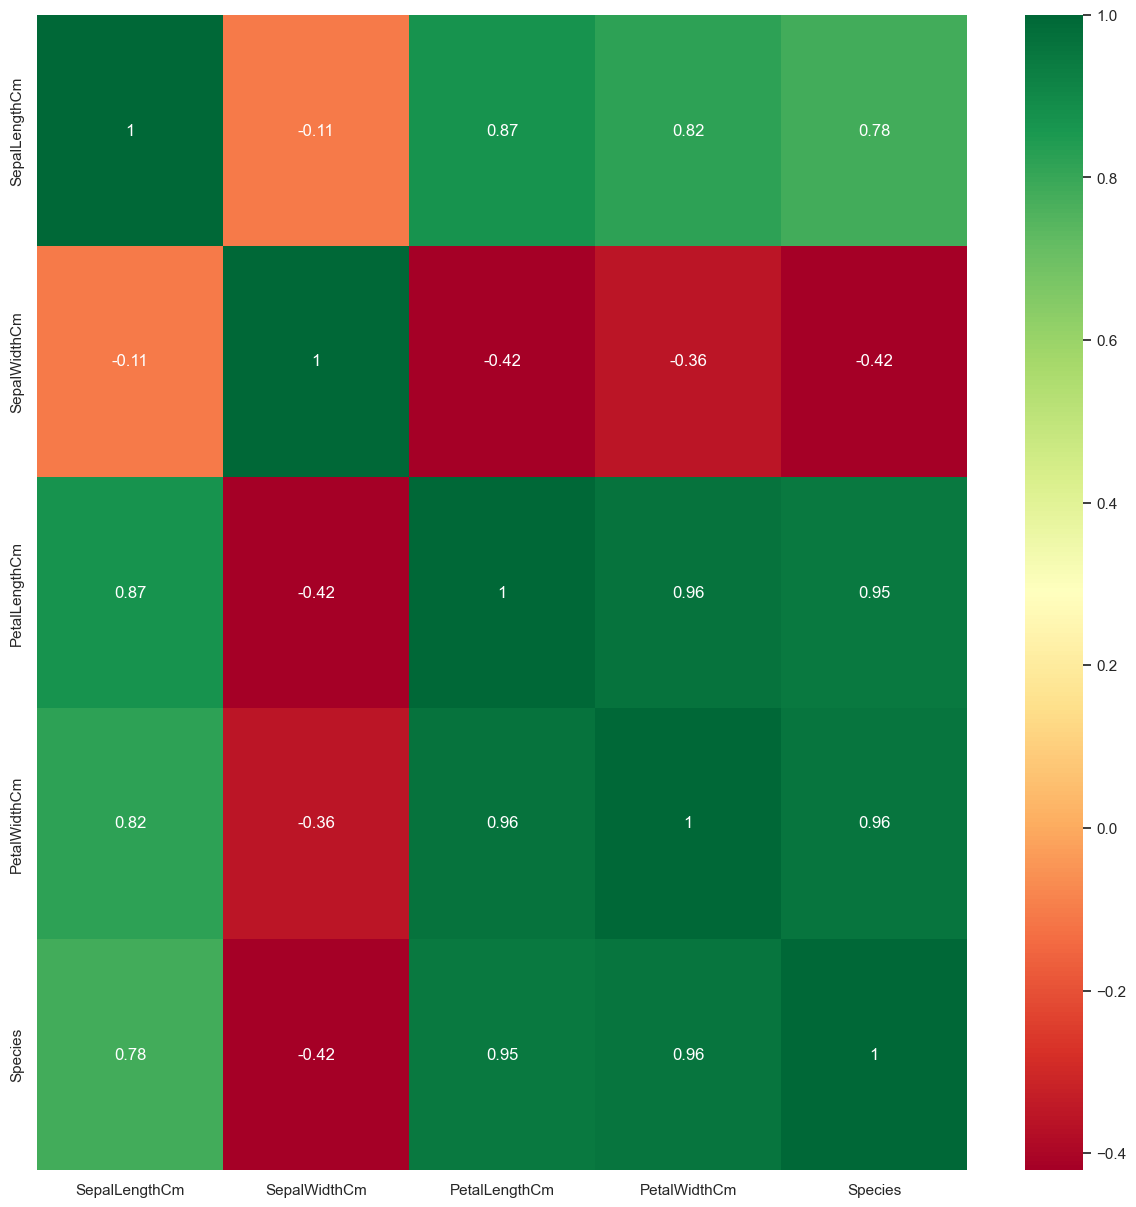

In [14]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

### One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features

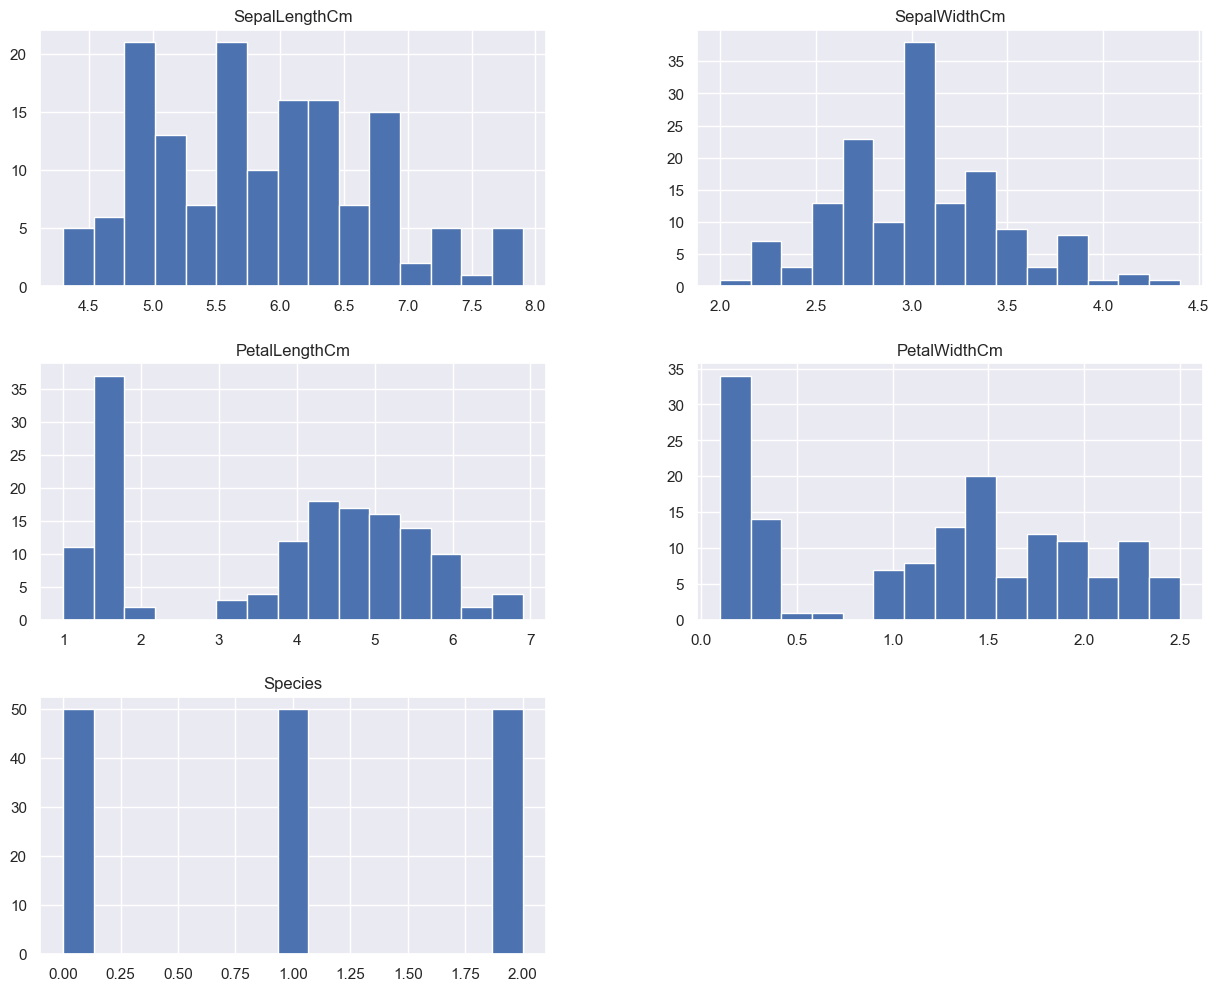

In [15]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

#### The  histogram distributions don't seem to be ideal.

# Modelling

# 1. Without PCA

In [16]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [19]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


# 2. With PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [21]:
X_new.shape

(150, 4)

In [22]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [23]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

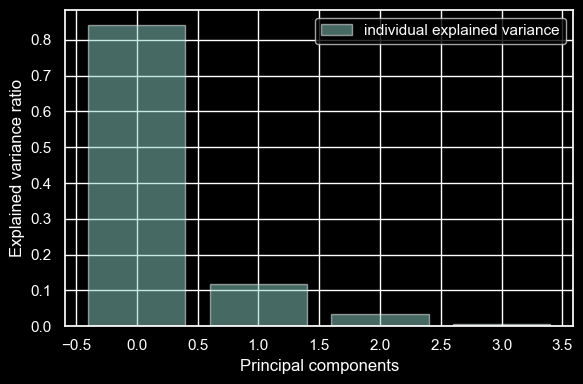

In [24]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [25]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [26]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [27]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


C:\Users\Neil\AppData\Local\Temp\ipykernel_5364\1819296938.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


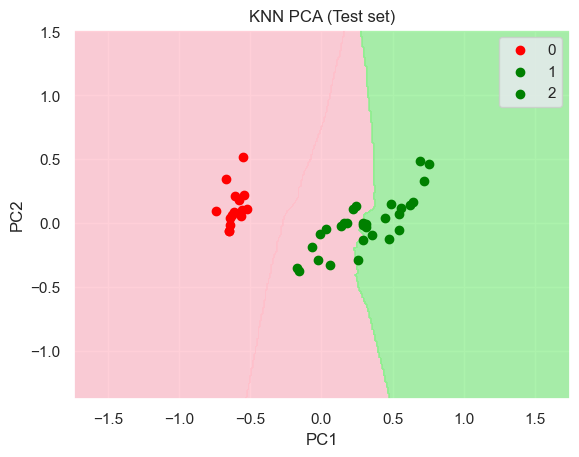

In [28]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()